In [164]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm_notebook
from keras.utils import np_utils
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
% matplotlib inline

# Making feature dataset after concatenation

In [755]:
# Importing HumanObserved-Features-Data.csv file

humanObservedFeaturesData = pd.read_csv("HumanObserved-Features-Data.csv")

In [756]:
humanObservedFeaturesData.head()

,Unnamed: 0,img_id,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,0,0359a,2,1,1,0,2,2,0,2,2
1,1,0577a,2,1,1,0,2,2,0,1,2
2,2,1120a,2,1,1,3,2,2,0,2,2
3,3,1120b,1,1,1,0,2,2,0,2,2
4,4,1120c,2,1,1,0,2,2,0,0,2


In [757]:
humanObservedFeaturesData.shape

(1026, 11)

In [758]:
humanObservedFeaturesData = humanObservedFeaturesData.drop('Unnamed: 0',axis=1)

In [759]:
humanObservedFeaturesData.head()

,img_id,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,0359a,2,1,1,0,2,2,0,2,2
1,0577a,2,1,1,0,2,2,0,1,2
2,1120a,2,1,1,3,2,2,0,2,2
3,1120b,1,1,1,0,2,2,0,2,2
4,1120c,2,1,1,0,2,2,0,0,2


In [760]:
humanObservedFeaturesData.shape

(1026, 10)

In [761]:
# Importing same_pairs.csv file

samePair = pd.read_csv("same_pairs.csv")

In [762]:
samePair.head()

,img_id_A,img_id_B,target
0,0359a,0359b,1
1,0577a,0577b,1
2,0577a,0577c,1
3,1120a,1120b,1
4,1120a,1120c,1


In [763]:
samePair.shape

(791, 3)

In [764]:
print(samePair['img_id_A'].unique().shape)  # It tells the number of distinct images in img_id_A column
print(samePair['img_id_B'].unique().shape)  # It tells the number of distinct images in img_id_B column

# Both columns have 564 distinct images out of 791 images

(564,)
(564,)


In [765]:
# Importing diffn_pairs.csv file

diffnPair = pd.read_csv("diffn_pairs.csv")

In [766]:
diffnPair.head()

,img_id_A,img_id_B,target
0,0359a,0577a,0
1,0359a,1120a,0
2,0359a,1120b,0
3,0359a,1120c,0
4,0359a,1121a,0


In [767]:
diffnPair.shape

(293032, 3)

In [768]:
# To make my feature dataset, here I am taking random 791 samples from diffnPair dataframe so that I can concatenate same pair
# and different pair along row axis.

humanObsFeatures = pd.concat([samePair, diffnPair[:791]])

In [769]:
humanObsFeatures.head()  # We can see in the target column, series of 1's is appearing and then series of 0's

,img_id_A,img_id_B,target
0,0359a,0359b,1
1,0577a,0577b,1
2,0577a,0577c,1
3,1120a,1120b,1
4,1120a,1120c,1


In [770]:
humanObsFeatures.shape  

(1582, 3)

In [771]:
hod = humanObsFeatures.values
np.random.shuffle(hod)          # Here I have shuffled the samples along row axis

In [772]:
hod     

array([['0359a', '0367c', 0],
       ['0359a', '1320a', 0],
       ['0359a', '0584b', 0],
       ..., 
       ['0359a', '1229b', 0],
       ['0507b', '0507c', 1],
       ['0359a', '1260c', 0]], dtype=object)

In [773]:
# We can clearly infer from above output that hod is shuffled.

In [774]:
columnIndex = humanObsFeatures.columns
columnIndex

Index(['img_id_A', 'img_id_B', 'target'], dtype='object')

In [775]:
humanObsFeatures =  pd.DataFrame(data = hod,columns=columnIndex)
humanObsFeatures.head()

,img_id_A,img_id_B,target
0,0359a,0367c,0
1,0359a,1320a,0
2,0359a,0584b,0
3,0544a,0544c,1
4,0359a,0335c,0


In [776]:
# To make human observed dataset after concatenation of features of image_A and image_B, we have to fetch features of image A
# and B from "humanObservedFeaturesData" dataframe.

In [777]:
img_id_A = humanObsFeatures['img_id_A'].values
img_id_B = humanObsFeatures['img_id_B'].values

In [778]:
humanObservedFeaturesData.head()

,img_id,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,0359a,2,1,1,0,2,2,0,2,2
1,0577a,2,1,1,0,2,2,0,1,2
2,1120a,2,1,1,3,2,2,0,2,2
3,1120b,1,1,1,0,2,2,0,2,2
4,1120c,2,1,1,0,2,2,0,0,2


In [779]:
# To fetch the features we have to reset the index

features = humanObservedFeaturesData.set_index(keys='img_id')
features.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9
img_id,,,,,,,,,
0359a,2,1,1,0,2,2,0,2,2
0577a,2,1,1,0,2,2,0,1,2
1120a,2,1,1,3,2,2,0,2,2
1120b,1,1,1,0,2,2,0,2,2
1120c,2,1,1,0,2,2,0,0,2


In [780]:
# Fetching Images_A features

img_id_A_features = features.loc[img_id_A]
img_id_A_features.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9
img_id,,,,,,,,,
0359a,2,1,1,0,2,2,0,2,2
0359a,2,1,1,0,2,2,0,2,2
0359a,2,1,1,0,2,2,0,2,2
0544a,0,1,1,0,2,2,0,1,1
0359a,2,1,1,0,2,2,0,2,2


In [781]:
img_id_A_features.shape

(1582, 9)

In [782]:
# Fetching Images_B features

img_id_B_features = features.loc[img_id_B]
img_id_B_features.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9
img_id,,,,,,,,,
0367c,3,1,1,3,2,2,0,1,2
1320a,1,1,1,3,2,1,0,3,2
0584b,2,1,1,1,2,2,1,2,2
0544c,1,4,1,3,2,2,2,0,1
0335c,3,1,1,0,2,1,1,3,2


In [783]:
img_id_B_features.shape

(1582, 9)

In [784]:
imageIds = humanObsFeatures[['img_id_A', 'img_id_B']].values
target = humanObsFeatures[['target']].values

In [785]:
subtractedFeatures = np.abs(img_id_A_features.values - img_id_B_features.values)
subtractedFeatures

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ..., 
       [1, 0, 0, ..., 0, 0, 0],
       [3, 3, 0, ..., 1, 3, 0],
       [1, 1, 0, ..., 1, 1, 0]], dtype=int64)

In [786]:
subtractedFeatures = np.hstack((imageIds, subtractedFeatures, target)) 

In [787]:
subtractedFeatures

array([['0359a', '0367c', 1, ..., 1, 0, 0],
       ['0359a', '1320a', 1, ..., 1, 0, 0],
       ['0359a', '0584b', 0, ..., 0, 0, 0],
       ..., 
       ['0359a', '1229b', 1, ..., 0, 0, 0],
       ['0507b', '0507c', 3, ..., 3, 0, 1],
       ['0359a', '1260c', 1, ..., 1, 0, 0]], dtype=object)

In [788]:
subtractedFeatures.shape

(1582, 12)

In [789]:
Indexcol = ['img_id_A', 'img_id_B'] + list(img_id_A_features.columns) + ['target']

In [790]:
Indexcol

['img_id_A',
 'img_id_B',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'target']

In [791]:
subtractedFeatures = pd.DataFrame(subtractedFeatures, columns = Indexcol)

In [792]:
subtractedFeatures.head()

,img_id_A,img_id_B,f1,f2,f3,f4,f5,f6,f7,f8,f9,target
0,0359a,0367c,1,0,0,3,0,0,0,1,0,0
1,0359a,1320a,1,0,0,3,0,1,0,1,0,0
2,0359a,0584b,0,0,0,1,0,0,1,0,0,0
3,0544a,0544c,1,3,0,3,0,0,2,1,0,1
4,0359a,0335c,1,0,0,0,0,1,1,1,0,0


In [793]:
subtractedFeatures.shape

(1582, 12)

In [794]:
columnIndex = ""

for i in range(1,19):
    columnIndex = columnIndex + 'f' + str(i) + ' '
columnIndex

'f1 f2 f3 f4 f5 f6 f7 f8 f9 f10 f11 f12 f13 f14 f15 f16 f17 f18 '

In [795]:
img_id_A_features.values


array([[2, 1, 1, ..., 0, 2, 2],
       [2, 1, 1, ..., 0, 2, 2],
       [2, 1, 1, ..., 0, 2, 2],
       ..., 
       [2, 1, 1, ..., 0, 2, 2],
       [0, 1, 1, ..., 1, 4, 2],
       [2, 1, 1, ..., 0, 2, 2]], dtype=int64)

In [796]:
img_id_B_features.values

array([[3, 1, 1, ..., 0, 1, 2],
       [1, 1, 1, ..., 0, 3, 2],
       [2, 1, 1, ..., 1, 2, 2],
       ..., 
       [1, 1, 1, ..., 0, 2, 2],
       [3, 4, 1, ..., 0, 1, 2],
       [3, 2, 1, ..., 1, 1, 2]], dtype=int64)

In [797]:
ConcatenatedFeatures = np.hstack((imageIds, img_id_A_features.values, img_id_B_features.values, target)) 

In [798]:
ConcatenatedFeatures

array([['0359a', '0367c', 2, ..., 1, 2, 0],
       ['0359a', '1320a', 2, ..., 3, 2, 0],
       ['0359a', '0584b', 2, ..., 2, 2, 0],
       ..., 
       ['0359a', '1229b', 2, ..., 2, 2, 0],
       ['0507b', '0507c', 0, ..., 1, 2, 1],
       ['0359a', '1260c', 2, ..., 1, 2, 0]], dtype=object)

In [799]:
col = ['img_id_A', 'img_id_B']+columnIndex.split() + ['target']  # Index of Columns 

In [800]:
col

['img_id_A',
 'img_id_B',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'target']

In [801]:
ConcatenatedFeatures = pd.DataFrame(ConcatenatedFeatures, columns = col)

In [802]:
ConcatenatedFeatures.head()

,img_id_A,img_id_B,f1,f2,f3,f4,f5,f6,f7,f8,...,f10,f11,f12,f13,f14,f15,f16,f17,f18,target
0,0359a,0367c,2,1,1,0,2,2,0,2,...,3,1,1,3,2,2,0,1,2,0
1,0359a,1320a,2,1,1,0,2,2,0,2,...,1,1,1,3,2,1,0,3,2,0
2,0359a,0584b,2,1,1,0,2,2,0,2,...,2,1,1,1,2,2,1,2,2,0
3,0544a,0544c,0,1,1,0,2,2,0,1,...,1,4,1,3,2,2,2,0,1,1
4,0359a,0335c,2,1,1,0,2,2,0,2,...,3,1,1,0,2,1,1,3,2,0


In [645]:
ConcatenatedFeatures.shape

(1582, 21)

In [646]:
# Now we have both datasets ConcatenatedFeatures and subtractedFeatures
subtractedFeatures.shape

(1582, 12)

In [647]:
# Generation of target vector from ConcatenatedFeatures and subtractedFeatures for human observed data and GSC

def getTargetVector(file):
    targetVec = file['target'].values
    return targetVec


# Generation of raw data matrix from ConcatenatedFeatures and subtractedFeatures for human observed data and GSC

def rawDataMatrix(file):
    rawData = file[file.columns].values
    return rawData[:,2:len(rawData[0])-1].T

In [648]:
# Creating the training target variable(70% of target variable)

def getTrainingTarget(rawTraining,TrainingPercent = 70): 
    TrainingLen = math.ceil(len(rawTraining)*(TrainingPercent*0.01))
    t = rawTraining[:TrainingLen]
    return t 


# Making the Training dataMatrix which is 70% of input dataset

def TrainingDataMatrix(rawData, TrainingPercent = 70): 
    T_len = math.ceil(len(rawData[0])*0.01*TrainingPercent)
    d2 = rawData[:,0:T_len]
    return d2 


# Making the Validation target(15% of input dataset)

def getValTargetVector(rawData, ValPercent, TrainingCount): 
    valSize = math.ceil(len(rawData)*ValPercent*0.01)
    V_End = TrainingCount + valSize
    t =rawData[TrainingCount+1:V_End]
    return t


# Creating Validation dataMatrix(15% of input dataset)

def ValDataMatrix(rawData, ValPercent, TrainingCount): 
    valSize = math.ceil(len(rawData[0])*ValPercent*0.01)
    V_End = TrainingCount + valSize
    dataMatrix = rawData[:,TrainingCount+1:V_End]  
    return dataMatrix 

In [649]:
def getBigSigma(Data,TrainingPercent):
    BigSigma    = np.zeros((len(Data),len(Data)))
    DataT       = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    varVect     = []
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,TrainingLen):
            vct.append(Data[i][j])    
        varVect.append(np.var(vct))
    
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j]  # BigSigma is getting assigned diagonally by all values of varVect
        
    
    return BigSigma

In [650]:
def getScalar(DataRow,Mu, BigSigInv):  
    R = np.subtract(DataRow,Mu)
    T = np.dot(BigSigInv,np.transpose(R))  
    L = np.dot(R,T)
    return L

def getRadialBasisOut(DataRow,Mu, BigSigInv):    
    phi_x = math.exp(-0.5*getScalar(DataRow,Mu,BigSigInv))
    return phi_x

def getPhiMatrix(Data, Mu, BigSigma, TrainingPercent = 70):
    DataT = np.transpose(Data) 
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    PHI = np.zeros((TrainingLen,len(Mu))) 
    BigSigInv = np.linalg.inv(BigSigma) 
    for  C in range(len(Mu)):
        for R in range(TrainingLen):
            PHI[R][C] = getRadialBasisOut(DataT[R], Mu[C], BigSigInv)
    
    return PHI

In [651]:
def getWeightsClosedForm(PHI, T, Lambda):
    Lambda_I = np.identity(len(PHI[0]))
    for i in range(0,len(PHI[0])):
        Lambda_I[i][i] = Lambda
    PHI_T       = np.transpose(PHI)
    PHI_SQR     = np.dot(PHI_T,PHI)
    PHI_SQR_LI  = np.add(Lambda_I,PHI_SQR)
    PHI_SQR_INV = np.linalg.inv(PHI_SQR_LI)
    INTER       = np.dot(PHI_SQR_INV, PHI_T)
    W           = np.dot(INTER, T)
    return W 

In [652]:
def getValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    return Y


# rms = root mean square

def getErms(VAL_TEST_OUT,ValDataAct): 
    sum = 0.0
    accuracy = 0.0
    counter = 0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

# Preparing Dataset

In [653]:
# For concatenatedFeatures Dataset

RawTargetConcat = getTargetVector(ConcatenatedFeatures)
RawDataConcat   = rawDataMatrix(ConcatenatedFeatures)


# For subtractedFeatures Dataset 

RawTargetSubtract = getTargetVector(subtractedFeatures)
RawDataSubtract   = rawDataMatrix(subtractedFeatures)

# Preparing Training Data

In [654]:
# For concatenatedFeatures Dataset

TrainingPercent=70
TrainingTargetConcat = getTrainingTarget(RawTargetConcat,TrainingPercent)
TrainingDataConcat   = TrainingDataMatrix(RawDataConcat,TrainingPercent)
print(TrainingTargetConcat.shape)
print(TrainingDataConcat.shape)

print()
# For subtractedFeatures Dataset 

TrainingTargetSubtract = getTrainingTarget(RawTargetSubtract,TrainingPercent)
TrainingDataSubtract   = TrainingDataMatrix(RawDataSubtract,TrainingPercent)
print(TrainingTargetSubtract.shape)
print(TrainingDataSubtract.shape)

(1108,)
(18, 1108)

(1108,)
(9, 1108)


# Preparing Validation Data

In [655]:
# For concatenatedFeatures Dataset

ValidationPercent= 15
ValDataActConcat = getValTargetVector(RawTargetConcat,ValidationPercent, (len(TrainingTargetConcat)))
ValDataConcat    = ValDataMatrix(RawDataConcat,ValidationPercent, (len(TrainingTargetConcat)))
print(ValDataActConcat.shape)
print(ValDataConcat.shape)

print()
# For subtractedFeatures Dataset 

ValDataActSubtract = getValTargetVector(RawTargetSubtract,ValidationPercent, (len(TrainingTargetSubtract)))
ValDataSubtract   = ValDataMatrix(RawDataSubtract,ValidationPercent, (len(TrainingTargetSubtract)))
print(ValDataActSubtract.shape)
print(ValDataSubtract.shape)

(237,)
(18, 237)

(237,)
(9, 237)


# Preparing Test Data

In [656]:
# For concatenatedFeatures Dataset

TestPercent = 15
TestDataActConcat = getValTargetVector(RawTargetConcat,TestPercent, (len(TrainingTargetConcat)+len(ValDataActConcat)))
TestDataConcat = ValDataMatrix(RawDataConcat,TestPercent, (len(TrainingTargetConcat)+len(ValDataActConcat)))
print(TestDataActConcat.shape)
print(TestDataConcat.shape)

print()
# For subtractedFeatures Dataset 

TestDataActSubtract = getValTargetVector(RawTargetSubtract,TestPercent, (len(TrainingTargetSubtract)+len(ValDataActSubtract)))
TestDataSubtract = ValDataMatrix(RawDataSubtract,TestPercent, (len(TrainingTargetSubtract)+len(ValDataActSubtract)))
print(TestDataActSubtract.shape)
print(TestDataSubtract.shape)

(236,)
(18, 236)

(236,)
(9, 236)


Text(0.5,1,'WCSS Vs. Number of clusters M')

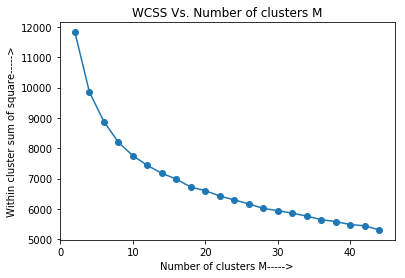

In [657]:
# For concatenatedFeatures Dataset

k_list = [2*M for M in range(1,23)]
WCSS = [] # Within cluster sum of square
for M in k_list:
    kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingDataConcat))
    WCSS.append(kmeans.inertia_)

# Elbow Method
plt.plot(k_list,WCSS,'o-')
plt.xlabel("Number of clusters M----->")
plt.ylabel("Within cluster sum of square----->")
plt.title("WCSS Vs. Number of clusters M")

Text(0.5,1,'WCSS Vs. Number of clusters M')

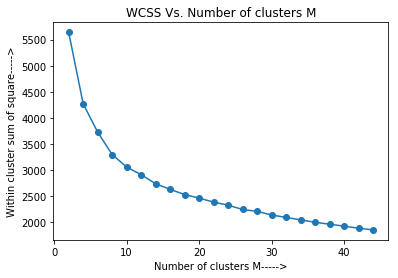

In [658]:
# For subtractedFeatures Dataset

k_list = [2*M for M in range(1,23)]
WCSS = [] # Within cluster sum of square
for M in k_list:
    kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingDataSubtract))
    WCSS.append(kmeans.inertia_)

# Elbow Method
plt.plot(k_list,WCSS,'o-')
plt.xlabel("Number of clusters M----->")
plt.ylabel("Within cluster sum of square----->")
plt.title("WCSS Vs. Number of clusters M")

# Closed form Solution

In [659]:
C_Lambda = 0.3
TrainingPercent = 70
ValidationPercent = 15
TestPercent = 15


# For concatenatedFeatures Dataset

kmeans = KMeans(n_clusters=9, random_state=0).fit(np.transpose(TrainingDataConcat))

Mu_c = kmeans.cluster_centers_
BigSigmaConcat      = getBigSigma(RawDataConcat, TrainingPercent)
TRAINING_PHI_Concat = getPhiMatrix(RawDataConcat, Mu_c, BigSigmaConcat, TrainingPercent)
W_Concat            = getWeightsClosedForm(TRAINING_PHI_Concat,TrainingTargetConcat,(C_Lambda)) 
TEST_PHI_Concat     = getPhiMatrix(TestDataConcat, Mu_c, BigSigmaConcat,100) 
VAL_PHI_Concat      = getPhiMatrix(ValDataConcat, Mu_c, BigSigmaConcat,100)


# For subtractedFeatures Dataset 
C_Lambda_ = 2.5
kmeans_ = KMeans(n_clusters=7, random_state=0).fit(np.transpose(TrainingDataSubtract))

Mu = kmeans_.cluster_centers_
BigSigmaSubtract      = getBigSigma(RawDataSubtract, TrainingPercent)
TRAINING_PHI_Subtract = getPhiMatrix(RawDataSubtract, Mu, BigSigmaSubtract, TrainingPercent)
W_Subtract            = getWeightsClosedForm(TRAINING_PHI_Subtract,TrainingTargetSubtract,(C_Lambda_)) 
TEST_PHI_Subtract     = getPhiMatrix(TestDataSubtract, Mu, BigSigmaSubtract,100) 
VAL_PHI_Subtract      = getPhiMatrix(ValDataSubtract, Mu, BigSigmaSubtract,100)

In [660]:
# For concatenatedFeatures Dataset

print(Mu_c.shape)
print(BigSigmaConcat.shape)
print(TRAINING_PHI_Concat.shape)
print(W_Concat.shape)
print(VAL_PHI_Concat.shape)
print(TEST_PHI_Concat.shape)
print()

# For subtractedFeatures Dataset 

print(Mu.shape)
print(BigSigmaSubtract.shape)
print(TRAINING_PHI_Subtract.shape)
print(W_Subtract.shape)
print(VAL_PHI_Subtract.shape)
print(TEST_PHI_Subtract.shape)

(9, 18)
(18, 18)
(1108, 9)
(9,)
(237, 9)
(236, 9)

(7, 9)
(9, 9)
(1108, 7)
(7,)
(237, 7)
(236, 7)


Text(0.5,1,'Training Accuracy Vs. Lamda')

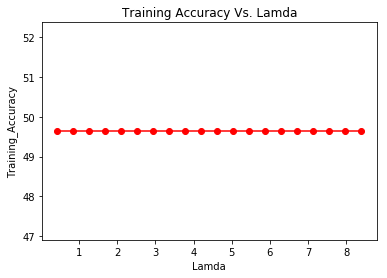

In [661]:
# To choose a value of regularization parameter(Lamda) with COncatenated training set

Lamda=[lamda*0.42 for lamda in range(1,21)]
Training_Accuracy = []
for lamda in Lamda:
  Weight = getWeightsClosedForm(TRAINING_PHI_Concat,TrainingTargetConcat,lamda) 
  TR_TEST_OUT  = getValTest(TRAINING_PHI_Concat,Weight)
  TrainingAcc= str(getErms(TR_TEST_OUT,TrainingTargetConcat))
  Training_Accuracy.append(float(TrainingAcc.split(',')[0]))
plt.plot(Lamda,Training_Accuracy,'ro-')
plt.ylabel("Training_Accuracy")
plt.xlabel("Lamda")
plt.title("Training Accuracy Vs. Lamda")

Text(0.5,1,'Training Accuracy Vs. Lamda')

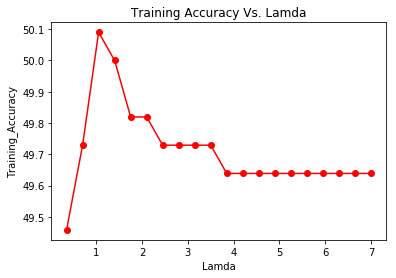

In [662]:
# To choose a value of regularization parameter(Lamda) with Subtracted training set

Lamda=[lamda*0.35 for lamda in range(1,21)]
Training_Accuracy = []
for lamda in Lamda:
  Weight = getWeightsClosedForm(TRAINING_PHI_Subtract,TrainingTargetSubtract,lamda) 
  TR_TEST_OUT  = getValTest(TRAINING_PHI_Subtract,Weight)
  TrainingAcc= str(getErms(TR_TEST_OUT,TrainingTargetSubtract))
  Training_Accuracy.append(float(TrainingAcc.split(',')[0]))
plt.plot(Lamda,Training_Accuracy,'ro-')
plt.ylabel("Training_Accuracy")
plt.xlabel("Lamda")
plt.title("Training Accuracy Vs. Lamda")

# Finding Erms on training, validation and test set

In [665]:
# For concatenatedFeatures Dataset

TR_TEST_OUT_Concat  = getValTest(TRAINING_PHI_Concat,W_Concat)
VAL_TEST_OUT_Concat = getValTest(VAL_PHI_Concat,W_Concat)
TEST_OUT_Concat     = getValTest(TEST_PHI_Concat,W_Concat)

TrainingAccuracy_Concat   = str(getErms(TR_TEST_OUT_Concat,TrainingTargetConcat))
ValidationAccuracy_Concat = str(getErms(VAL_TEST_OUT_Concat,ValDataActConcat))
TestAccuracy_Concat       = str(getErms(TEST_OUT_Concat,TestDataActConcat))

# For subtractedFeatures Dataset 

TR_TEST_OUT_Subtract  = getValTest(TRAINING_PHI_Subtract,W_Subtract)
VAL_TEST_OUT_Subtract = getValTest(VAL_PHI_Subtract,W_Subtract)
TEST_OUT_Subtract     = getValTest(TEST_PHI_Subtract,W_Subtract)

TrainingAccuracy_Subtract   = str(getErms(TR_TEST_OUT_Subtract,TrainingTargetSubtract))
ValidationAccuracy_Subtract = str(getErms(VAL_TEST_OUT_Subtract,ValDataActSubtract))
TestAccuracy_Subtract      = str(getErms(TEST_OUT_Subtract,TestDataActSubtract))

In [666]:
# For concatenatedFeatures Dataset

print("# Accuracy of concatenatedFeatures Dataset\n")

print("Training accuracy   = " + TrainingAccuracy_Concat.split(',')[0])
print("Validation accuracy = " +  ValidationAccuracy_Concat.split(',')[0])
print("Test accuracy       = " +  TestAccuracy_Concat.split(',')[0]+"\n")

print ("E_rms Training   = " + str(float(TrainingAccuracy_Concat.split(',')[1])))
print ("E_rms Validation = " + str(float(ValidationAccuracy_Concat.split(',')[1])))
print ("E_rms Testing    = " + str(float(TestAccuracy_Concat.split(',')[1]))+"\n\n\n")


# For subtractedFeatures Dataset 

print("# Accuracy of subtractedFeatures Dataset\n")

print("Training accuracy   = " + TrainingAccuracy_Subtract.split(',')[0])
print("Validation accuracy = " +  ValidationAccuracy_Subtract.split(',')[0])
print("Test accuracy       = " +  TestAccuracy_Subtract.split(',')[0]+"\n")

print ("E_rms Training   = " + str(float(TrainingAccuracy_Subtract.split(',')[1])))
print ("E_rms Validation = " + str(float(ValidationAccuracy_Subtract.split(',')[1])))
print ("E_rms Testing    = " + str(float(TestAccuracy_Subtract.split(',')[1])))

# Accuracy of concatenatedFeatures Dataset

Training accuracy   = 49.63898916967509
Validation accuracy = 51.89873417721519
Test accuracy       = 49.57627118644068

E_rms Training   = 0.7075236628056162
E_rms Validation = 0.6925909289892813
E_rms Testing    = 0.7083605821521434



# Accuracy of subtractedFeatures Dataset

Training accuracy   = 49.72924187725632
Validation accuracy = 51.89873417721519
Test accuracy       = 49.57627118644068

E_rms Training   = 0.6745852488570461
E_rms Validation = 0.6604702515472782
E_rms Testing    = 0.6710279093477182


# Gradient Descent Solution

In [667]:
# For Concatenated features dataset

W_Now        = np.dot(220, W_Concat) # It intializes with random value
La           = 2 # Lamda
learningRate = 0.125
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []

for i in range(0,400):
    
    #print ('---------Iteration: ' + str(i) + '--------------')
    Delta_E_D     = -np.dot((TrainingTargetConcat[i] - np.dot(np.transpose(W_Now),TRAINING_PHI_Concat[i])),TRAINING_PHI_Concat[i])
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Concat,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetConcat)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = getValTest(VAL_PHI_Concat,W_T_Next) 
    Erms_Val      = getErms(VAL_TEST_OUT,ValDataActConcat)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = getValTest(TEST_PHI_Concat,W_T_Next) 
    Erms_Test = getErms(TEST_OUT,TestDataActConcat)
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))

Text(0.5,1,'Training_Erms Vs. Learningrate')

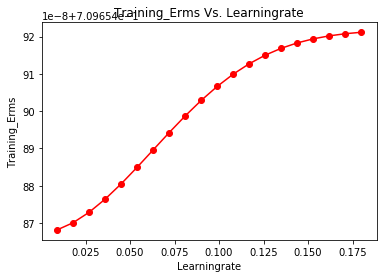

In [668]:
# To find the learning rate for Concatenated features

Learningrate = [0.009*i for i in range(1,21)]
Training_Erms=[]
for l in Learningrate:
    
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(l,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Concat,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetConcat)
    Training_Erms.append(float(Erms_TR.split(',')[1]))

    
plt.plot(Learningrate,Training_Erms,'ro-')
plt.ylabel("Training_Erms")
plt.xlabel("Learningrate")
plt.title("Training_Erms Vs. Learningrate")

In [669]:
print ('----------Gradient Descent Solution for Concatenated features--------------------')
print("Accuracy")
print("Training accuracy   = " +TrainingAccuracy_Concat.split(',')[0])
print("Validation accuracy = " + ValidationAccuracy_Concat.split(',')[0])
print("Test accuracy       = " + TestAccuracy_Concat.split(',')[0]+"\n")
print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))

----------Gradient Descent Solution for Concatenated features--------------------
Accuracy
Training accuracy   = 49.63898916967509
Validation accuracy = 51.89873417721519
Test accuracy       = 49.57627118644068

E_rms Training   = 0.70443
E_rms Validation = 0.69177
E_rms Testing    = 0.7058


In [670]:
# For Subtracted features dataset

W_Now_       = np.dot(220, W_Subtract) # It intializes with random value
La           = 2 # Lamda
learningRate = 0.01
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []

for i in range(0,400):
    
    #print ('---------Iteration: ' + str(i) + '--------------')
    Delta_E_D     = -np.dot((TrainingTargetSubtract[i] - np.dot(np.transpose(W_Now_),TRAINING_PHI_Subtract[i])),TRAINING_PHI_Subtract[i])
    La_Delta_E_W  = np.dot(La,W_Now_)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now_ + Delta_W
    W_Now_        = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Subtract,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetSubtract)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = getValTest(VAL_PHI_Subtract,W_T_Next) 
    Erms_Val      = getErms(VAL_TEST_OUT,ValDataActSubtract)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = getValTest(TEST_PHI_Subtract,W_T_Next) 
    Erms_Test = getErms(TEST_OUT,TestDataActSubtract)
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))

Text(0.5,1,'Training_Erms Vs. Learningrate')

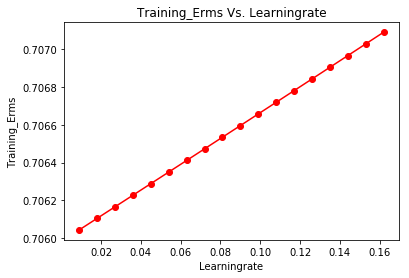

In [671]:
# To find the learning rate for Subtracted features

Learningrate = [0.009*i for i in range(1,19)]
Training_Erms=[]
for l in Learningrate:
    
    La_Delta_E_W  = np.dot(La,W_Now_)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(l,Delta_E)
    W_T_Next      = W_Now_ + Delta_W
    W_Now         = W_T_Next
    
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Subtract,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetSubtract)
    Training_Erms.append(float(Erms_TR.split(',')[1]))

    
plt.plot(Learningrate,Training_Erms,'ro-')
plt.ylabel("Training_Erms")
plt.xlabel("Learningrate")
plt.title("Training_Erms Vs. Learningrate")

In [672]:
print ('----------Gradient Descent Solution for Subtracted features--------------------')
print("Accuracy")
print("Training accuracy   = " +TrainingAccuracy_Subtract.split(',')[0])
print("Validation accuracy = " + ValidationAccuracy_Subtract.split(',')[0])
print("Test accuracy       = " + TestAccuracy_Subtract.split(',')[0]+"\n")
print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))

----------Gradient Descent Solution for Subtracted features--------------------
Accuracy
Training accuracy   = 49.72924187725632
Validation accuracy = 51.89873417721519
Test accuracy       = 49.57627118644068

E_rms Training   = 0.67047
E_rms Validation = 0.65627
E_rms Testing    = 0.66569


# Logistic Regression

In [673]:
# We have our desirable dataset ConcatenaatedFeatures and SubtractedFearures

In [674]:
ConcatenatedFeatures.head()

,img_id_A,img_id_B,f1,f2,f3,f4,f5,f6,f7,f8,...,f10,f11,f12,f13,f14,f15,f16,f17,f18,target
0,1325a,1325c,3,1,1,0,1,2,0,1,...,1,4,1,3,2,3,1,2,2,1
1,0359a,1096a,2,1,1,0,2,2,0,2,...,2,1,1,1,2,3,0,4,2,0
2,0577a,1320c,2,1,1,0,2,2,0,1,...,2,2,1,0,2,2,0,3,2,0
3,1325b,1325c,0,1,1,1,2,2,1,2,...,1,4,1,3,2,3,1,2,2,1
4,0359a,1284c,2,1,1,0,2,2,0,2,...,3,1,1,0,2,1,1,2,2,0


In [675]:
subtractedFeatures.head()

,img_id_A,img_id_B,f1,f2,f3,f4,f5,f6,f7,f8,f9,target
0,1325a,1325c,2,3,0,3,1,1,1,1,0,1
1,0359a,1096a,0,0,0,1,0,1,0,2,0,0
2,0577a,1320c,0,1,0,0,0,0,0,2,0,0
3,1325b,1325c,1,3,0,2,0,1,0,0,1,1
4,0359a,1284c,1,0,0,0,0,1,1,0,0,0


In [676]:
Bias = pd.DataFrame(np.ones((len(ConcatenatedFeatures),1)), columns = ['Bias'])
Bias.head()

,Bias
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [677]:
Bias.shape

(1582, 1)

In [678]:
# For ConccatenatedFeatures

ConcatenatedFeatures_ = pd.concat([Bias, ConcatenatedFeatures[ConcatenatedFeatures.columns[2:-1]]], axis=1)
ConcatenatedFeatures_.shape

(1582, 19)

In [679]:
ConcatenatedFeatures_.head()

,Bias,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18
0,1.0,3,1,1,0,1,2,0,1,2,1,4,1,3,2,3,1,2,2
1,1.0,2,1,1,0,2,2,0,2,2,2,1,1,1,2,3,0,4,2
2,1.0,2,1,1,0,2,2,0,1,2,2,2,1,0,2,2,0,3,2
3,1.0,0,1,1,1,2,2,1,2,1,1,4,1,3,2,3,1,2,2
4,1.0,2,1,1,0,2,2,0,2,2,3,1,1,0,2,1,1,2,2


In [680]:
# For SubtractedFeatures
subtractedFeatures_ = pd.concat([Bias, subtractedFeatures[subtractedFeatures.columns[2:-1]]], axis=1)
subtractedFeatures_.shape

(1582, 10)

In [681]:
subtractedFeatures_.head()

,Bias,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,1.0,2,3,0,3,1,1,1,1,0
1,1.0,0,0,0,1,0,1,0,2,0
2,1.0,0,1,0,0,0,0,0,2,0
3,1.0,1,3,0,2,0,1,0,0,1
4,1.0,1,0,0,0,0,1,1,0,0


In [682]:
# For concatenatedfeatures
weight = np.zeros(19)  # Bceause 19 is the number of features including bias

In [683]:
def sigmoidFunction(inputData, weight):
    sigmoid = 1/(np.exp(-1 * np.matmul(inputData, weight)))
    return sigmoid

In [684]:
def cost_function(m,data,weight,Target):
    J = 1/m*(-1*Target.T.dot(np.log(sigmoidFunction(data,weight))) - (1 - Target).T.dot(np.log(1-sigmoidFunction(data,weight))))
    return J

In [685]:
def gd(m,weight,X, Target, Learningrate): # gd stands for Gradient Descent
    cost_functionList = [0]* 500 
    for i in tqdm_notebook(range(500)):
        weight = weight - (Learningrate/m) * ( X.T.dot((sigmoidFunction(X,weight) - Target)))
        cost = cost_function(m,X,weight,Target)
        cost_functionList[i] = cost
    return weight, cost_functionList

In [686]:
# For ConcatenatedFeatures training set
m = len(ConcatenatedFeatures_) # number of training examples
Target_ = ConcatenatedFeatures['target'].values.astype(float)
TrainingPercent = int((80/100)*len(Target_))
Target = Target_[:TrainingPercent]
Learningrate = 0.002
X_ = ConcatenatedFeatures_.values.astype(float)
concatInput = X_[:TrainingPercent]
New_weight_concat, costList_concat = gd(m,weight,concatInput,Target,Learningrate)

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

C:\Users\abhi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [687]:
# For subtractedFeatures

weight_subtract = np.zeros(10)  # Bceause 10 is the number of features including bias

In [688]:
# For subtractedFeatures training set

Learningrate_ = 0.05
X_subtract = subtractedFeatures_.values.astype(float)
subtractInput = X_subtract[:TrainingPercent]
New_weight_subtract, costList_subtract = gd(m,weight_subtract,subtractInput,Target,Learningrate_)

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

C:\Users\abhi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [689]:
# For concatenated test set

predict_concat = sigmoidFunction(X_[TrainingPercent+1:],New_weight_concat)

# For subtracted test set

predict_subtract = sigmoidFunction(X_subtract[TrainingPercent+1:],New_weight_subtract)

In [690]:
def estimatedOutput(predict,Target):
    right = 0
    wrong = 0
    
    for i in range(len(Target)):
        if np.around(predict[i]) == Target[i]:
            right += 1
        else:
            wrong +=1
    return right, wrong

In [691]:
# For concatenatedfeatures
Target_concat = Target_[TrainingPercent+1:]
Right, Wrong = estimatedOutput(predict_concat,Target_concat)
print("Accuracy is " + str(Right/len(Target_concat)*100))
print("Error is " + str(Wrong/len(Target_concat)*100))


print()
# For subtractedfeatures

Target_subtract = Target_[TrainingPercent+1:]
Right, Wrong = estimatedOutput(predict_subtract,Target_subtract)
print("Accuracy is " + str(Right/len(Target_subtract)*100))
print("Error is " + str(Wrong/len(Target_subtract)*100))

Accuracy is 79.74683544303798
Error is 20.253164556962027

Accuracy is 77.84810126582279
Error is 22.151898734177212


Text(0.5,1,'Cost funcion J Vs. Iterations')

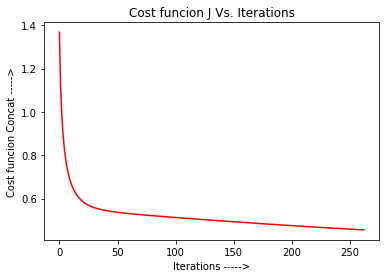

In [692]:
# For Concatenated set

Iterations = list(range(500))
plt.plot(Iterations,costList_concat,'r-')
plt.ylabel("Cost funcion Concat ----->")
plt.xlabel("Iterations ----->")
plt.title("Cost funcion J Vs. Iterations")

Text(0.5,1,'Cost funcion J Vs. Iterations')

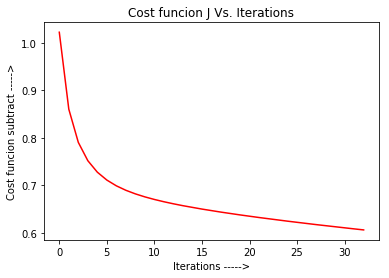

In [693]:
# For Subtracted set

Iterations = list(range(500))
plt.plot(Iterations,costList_subtract,'r-')
plt.ylabel("Cost funcion subtract ----->")
plt.xlabel("Iterations ----->")
plt.title("Cost funcion J Vs. Iterations")

# Artificial Neural Network

In [694]:
ConcatenatedFeatures_.head()

,Bias,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18
0,1.0,3,1,1,0,1,2,0,1,2,1,4,1,3,2,3,1,2,2
1,1.0,2,1,1,0,2,2,0,2,2,2,1,1,1,2,3,0,4,2
2,1.0,2,1,1,0,2,2,0,1,2,2,2,1,0,2,2,0,3,2
3,1.0,0,1,1,1,2,2,1,2,1,1,4,1,3,2,3,1,2,2
4,1.0,2,1,1,0,2,2,0,2,2,3,1,1,0,2,1,1,2,2


In [695]:
subtractedFeatures_.head()

,Bias,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,1.0,2,3,0,3,1,1,1,1,0
1,1.0,0,0,0,1,0,1,0,2,0
2,1.0,0,1,0,0,0,0,0,2,0
3,1.0,1,3,0,2,0,1,0,0,1
4,1.0,1,0,0,0,0,1,1,0,0


In [696]:
subtractedFeatures_.values[:,1:]

array([[2, 3, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 1, 0, ..., 0, 2, 0],
       ..., 
       [0, 1, 0, ..., 0, 3, 1],
       [0, 0, 0, ..., 1, 2, 0],
       [1, 0, 0, ..., 0, 3, 0]], dtype=object)

# Training the Model

In [697]:
from sklearn.model_selection import train_test_split

In [698]:
# For concatenated set

X_train_concat, X_test_concat, y_train_concat, y_test_concat = train_test_split(ConcatenatedFeatures_.values[:,1:], ConcatenatedFeatures['target'].values,test_size =0.2,random_state=0)

In [699]:
# For subtracted set

X_train_subtract, X_test_subtract, y_train_subtract, y_test_subtract = train_test_split(subtractedFeatures_.values[:,1:], subtractedFeatures['target'].values,test_size =0.2,random_state=0)

In [700]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [701]:
# Initialising the ANN

In [702]:
classifier_concat = Sequential()
classifier_subtract =Sequential()

In [703]:
# Adding the input layer and the first hidden layer

In [731]:
# For concatenated dataset

classifier_concat.add(Dense(units=64, kernel_initializer='uniform',activation='relu',input_dim=18))

# For subtracted dataset

classifier_subtract.add(Dense(units=64, kernel_initializer='uniform',activation='relu',input_dim=9))

In [732]:
# For concatenated dataset

classifier_concat.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

# For subtracted dataset

classifier_subtract.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

In [733]:
# Compiling the ANN

In [734]:
# For concatenated dataset

classifier_concat.compile(optimizer='sgd',loss ='binary_crossentropy', metrics=['accuracy'])

# For subtracted dataset

classifier_subtract.compile(optimizer='sgd',loss ='binary_crossentropy', metrics=['accuracy'])

In [735]:
# fitting the ANN to the Training set

# For concatenated Dataset
classifier_concat.fit(X_train_concat,y_train_concat,batch_size=24,epochs=100)

Epoch 1/100
1265/1265 [==============================] - ETA: 38s - loss: 0.6926 - acc: 0.54 - ETA: 0s - loss: 0.6924 - acc: 0.6744 - ETA: 0s - loss: 0.6922 - acc: 0.761 - 1s 687us/step - loss: 0.6921 - acc: 0.7858
Epoch 2/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6913 - acc: 0.958 - ETA: 0s - loss: 0.6912 - acc: 0.943 - ETA: 0s - loss: 0.6911 - acc: 0.951 - ETA: 0s - loss: 0.6909 - acc: 0.963 - 0s 165us/step - loss: 0.6908 - acc: 0.9644
Epoch 3/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6903 - acc: 1.000 - ETA: 0s - loss: 0.6898 - acc: 0.954 - ETA: 0s - loss: 0.6895 - acc: 0.830 - 0s 102us/step - loss: 0.6894 - acc: 0.8545
Epoch 4/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6885 - acc: 0.958 - ETA: 0s - loss: 0.6884 - acc: 0.981 - ETA: 0s - loss: 0.6880 - acc: 0.986 - 0s 108us/step - loss: 0.6878 - acc: 0.9858
Epoch 5/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6860 - acc: 1.000 - ETA: 0s - 

1265/1265 [==============================] - ETA: 0s - loss: 0.0538 - acc: 1.000 - ETA: 0s - loss: 0.0728 - acc: 0.991 - ETA: 0s - loss: 0.0743 - acc: 0.991 - 0s 98us/step - loss: 0.0726 - acc: 0.9921
Epoch 78/100
1265/1265 [==============================] - ETA: 0s - loss: 0.0430 - acc: 1.000 - ETA: 0s - loss: 0.0623 - acc: 0.996 - ETA: 0s - loss: 0.0694 - acc: 0.992 - 0s 100us/step - loss: 0.0710 - acc: 0.9921
Epoch 79/100
1265/1265 [==============================] - ETA: 0s - loss: 0.0553 - acc: 1.000 - ETA: 0s - loss: 0.0692 - acc: 0.990 - ETA: 0s - loss: 0.0684 - acc: 0.992 - 0s 102us/step - loss: 0.0695 - acc: 0.9921
Epoch 80/100
1265/1265 [==============================] - ETA: 0s - loss: 0.1359 - acc: 0.958 - ETA: 0s - loss: 0.0680 - acc: 0.991 - ETA: 0s - loss: 0.0680 - acc: 0.991 - 0s 103us/step - loss: 0.0708 - acc: 0.9905
Epoch 81/100
1265/1265 [==============================] - ETA: 0s - loss: 0.0520 - acc: 1.000 - ETA: 0s - loss: 0.0589 - acc: 0.996 - ETA: 0s - loss: 0.06

In [736]:
# fitting the ANN to the Training set

# For subtracted Dataset
classifier_subtract.fit(X_train_subtract,y_train_subtract,batch_size=24,epochs=100)

Epoch 1/100
1265/1265 [==============================] - ETA: 36s - loss: 0.6936 - acc: 0.50 - ETA: 5s - loss: 0.6935 - acc: 0.3750 - ETA: 0s - loss: 0.6933 - acc: 0.458 - ETA: 0s - loss: 0.6932 - acc: 0.483 - 1s 695us/step - loss: 0.6931 - acc: 0.5075
Epoch 2/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6926 - acc: 0.791 - ETA: 0s - loss: 0.6925 - acc: 0.685 - ETA: 0s - loss: 0.6923 - acc: 0.652 - 0s 99us/step - loss: 0.6922 - acc: 0.6751
Epoch 3/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6920 - acc: 0.750 - ETA: 0s - loss: 0.6916 - acc: 0.573 - ETA: 0s - loss: 0.6914 - acc: 0.618 - 0s 100us/step - loss: 0.6913 - acc: 0.6530
Epoch 4/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6904 - acc: 0.916 - ETA: 0s - loss: 0.6906 - acc: 0.686 - ETA: 0s - loss: 0.6905 - acc: 0.753 - 0s 100us/step - loss: 0.6904 - acc: 0.7676
Epoch 5/100
1265/1265 [==============================] - ETA: 0s - loss: 0.6905 - acc: 0.833 - ETA: 0s - l

Epoch 39/100
1265/1265 [==============================] - ETA: 0s - loss: 0.5648 - acc: 0.708 - ETA: 0s - loss: 0.5208 - acc: 0.822 - ETA: 0s - loss: 0.5180 - acc: 0.837 - 0s 99us/step - loss: 0.5180 - acc: 0.8332
Epoch 40/100
1265/1265 [==============================] - ETA: 0s - loss: 0.5147 - acc: 0.958 - ETA: 0s - loss: 0.5123 - acc: 0.835 - ETA: 0s - loss: 0.5063 - acc: 0.839 - 0s 100us/step - loss: 0.5094 - acc: 0.8348
Epoch 41/100
1265/1265 [==============================] - ETA: 0s - loss: 0.5022 - acc: 0.833 - ETA: 0s - loss: 0.5140 - acc: 0.827 - ETA: 0s - loss: 0.5026 - acc: 0.838 - 0s 103us/step - loss: 0.5010 - acc: 0.8372
Epoch 42/100
1265/1265 [==============================] - ETA: 0s - loss: 0.4344 - acc: 0.875 - ETA: 0s - loss: 0.4771 - acc: 0.845 - ETA: 0s - loss: 0.4888 - acc: 0.842 - 0s 103us/step - loss: 0.4930 - acc: 0.8372
Epoch 43/100
1265/1265 [==============================] - ETA: 0s - loss: 0.4026 - acc: 0.958 - ETA: 0s - loss: 0.4795 - acc: 0.840 - ETA: 0s

In [737]:
# For concatenated Dataset

y_pred_concat = classifier_concat.predict(X_test_concat)

# For subtracted Dataset

y_pred_subtract = classifier_subtract.predict(X_test_subtract)

In [738]:
y_pred_concat = (y_pred_concat > 0.5)
y_pred_concat =y_pred_concat.astype(int)
y_pred_concat = [y_pred_concat[i][0] for i in range(len(y_pred_subtract))]

y_pred_subtract = (y_pred_subtract > 0.5)
y_pred_subtract = y_pred_subtract.astype(int)
y_pred_subtract = [y_pred_subtract[i][0] for i in range(len(y_pred_subtract))]

In [739]:
def evaluation(predict,Target):
    right = 0
    wrong = 0
    
    for i in range(len(Target)):
        if predict[i] == Target[i]:
            right += 1
        else:
            wrong +=1
    return right, wrong

In [740]:
# For concatenatedfeatures

Right_concat, Wrong_concat = evaluation(y_pred_concat,y_test_concat)
print("Accuracy is " + str(Right_concat/len(y_test_concat)*100))
print("Error is " + str(Wrong_concat/len(y_test_concat)*100))

print()
# For subtractedfeatures

Right_subtract, Wrong_subtract = evaluation(y_pred_subtract,y_test_subtract)
print("Accuracy is " + str(Right_subtract/len(y_test_subtract)*100))
print("Error is " + str(Wrong_subtract/len(y_test_subtract)*100))

Accuracy is 98.42271293375394
Error is 1.5772870662460567

Accuracy is 83.2807570977918
Error is 16.7192429022082
